### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [951]:
data = pd.read_csv(r'C:\Users\amit2\Downloads\assignment_5_1_starter\data\coupons.csv')

In [953]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# Missing Data

Look for missing values, duplicates and the distinct types of values which have been input to get a sense of the quality of the data

In [958]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [960]:
pd.options.mode.chained_assignment = None 

duplicate_rows = data[data.duplicated(subset=None, keep = 'first')]
#print(duplicate_rows)

74 duplicate rows were found, we are chosing to keep the first value of each and remove the rest

In [963]:
CleanedData = data.drop_duplicates(inplace=False)
#print(CleanedData)

In [965]:
CleanedData.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

# Analysis of Structure of Data

Look at the unique values in each column and look for typos, capitalizations and other errors which may affect the results.

In [968]:
pd.Series(list(map(set,CleanedData.values.T)),index=CleanedData.columns)

destination                                 {Home, No Urgent Place, Work}
passanger                             {Partner, Friend(s), Kid(s), Alone}
weather                                             {Rainy, Sunny, Snowy}
temperature                                                  {80, 30, 55}
time                                          {2PM, 7AM, 10AM, 10PM, 6PM}
coupon                  {Restaurant(20-50), Carry out & Take away, Cof...
expiration                                                       {2h, 1d}
gender                                                     {Male, Female}
age                             {26, 46, 31, 41, 50plus, below21, 21, 36}
maritalStatus           {Unmarried partner, Married partner, Divorced,...
has_children                                                       {0, 1}
education               {Associates degree, Bachelors degree, High Sch...
occupation              {Retired, Healthcare Support, Unemployed, Food...
income                  {$75000 - $874

Lets clean up the naming of some of these rows:

In [971]:
CleanedData = CleanedData.rename(columns={'passanger': 'Passenger',
                                 'age': 'Age',
                                 'maritalStatus': 'Marital_Status',
                                 'has_children': 'Has Children',
                                 'CoffeeHouse': 'Coffee_House',
                                 'CarryAway': 'Carry_Away',
                                 'coupon': 'Coupon_Type',
                                 'weater': 'Weather',
                                 'Y': 'Coupon_Accepted'})

In [973]:
CleanedData['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

Due to the way the data was inputed, users selected all the responses from a list of provided values which reduces the chances of structural errors. However for the columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50' there are the values 'never' and 'less than 1' which actually mean the same thing in this context. For this exercise I will replace the value of of 'less than 1' with 'Never' to clean in preparation for analysis.

In [976]:
CleanedData[['Bar', 'Coffee_House', 'Carry_Away', 'RestaurantLessThan20', 'Restaurant20To50']] = CleanedData[['Bar', 'Coffee_House', 'Carry_Away', 'RestaurantLessThan20', 'Restaurant20To50']].replace('less1', 'never')


Check that the values were updated

In [979]:
print(CleanedData.query('Bar == "less1" or Coffee_House == "less1" or  Carry_Away == "less1" or  RestaurantLessThan20 == "less1" or  Restaurant20To50 == "less1"'))


Empty DataFrame
Columns: [destination, Passenger, weather, temperature, time, Coupon_Type, expiration, gender, Age, Marital_Status, Has Children, education, occupation, income, car, Bar, Coffee_House, Carry_Away, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Coupon_Accepted]
Index: []

[0 rows x 26 columns]


In the Age column we have values like 'Below21' and '50plus', these values will not allow for good data analysis and we must replace them with a reasonable value. 
 - 50Plus: 50
 - Below21: 20

In [982]:
CleanedData['Bar'].unique()

array(['never', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [984]:
CleanedData['Age'] = CleanedData['Age'].replace({'50plus': 50, 'below21': 20})
#set the column to be an int64
CleanedData['Age'] = CleanedData['Age'].astype('int64')
#CleanedData['Age'].unique()

Replacing the values in the income buckets where the values are '100000 or more' and 'less than 12500'

In [987]:
CleanedData['income'] = CleanedData['income'].replace({'$100000 or More': '$100000', 'Less than $12500': '$12500'})

# Deal with Missing Data

3. Decide what to do about your missing data -- drop, replace, other...

Now we will look for missing values in each column and then look into each column which has missing values

In [992]:
values = ''
missing_values = CleanedData.isnull().sum() *100/len(data)
missing_value_df = pd.DataFrame({ 'Rows Missing':CleanedData.isnull().sum(), '%_filled': missing_values})
#missing_value_df = missing_value_df.sort_values(by="percent_missing", ascending = False)
print(missing_value_df.query('`Rows Missing` > 0'))

                      Rows Missing   %_filled
car                          12502  98.565121
Bar                            107   0.843582
Coffee_House                   217   1.710817
Carry_Away                     150   1.182592
RestaurantLessThan20           129   1.017029
Restaurant20To50               189   1.490066


In [994]:
CleanedData['Bar'].unique()

array(['never', '1~3', 'gt8', nan, '4~8'], dtype=object)

Though most columns have good data, the following need a closer look:
Car: Out of 12610 entries, 12502  had no value, this column will not be useful to us, that is more than 98.6% of the values were null and we cannot infer this data from the other columns we have
Bar, CoffeeHouse, CarryAway: All multi-select values, we will have to investigate what the  distribution of actual values maybe

In [997]:
#CleanedData.dropna(axis = 0, how ='any')  -- decided against 
#CleanedData.info()
#CleanedData[['Bar', 'Coffee_House', 'Carry_Away']] = CleanedData[['Bar', 'Coffee_House', 'Carry_Away']].fillna('No Value', inplace=True)

In [999]:
values = ''
missing_values = ''
missing_value_df = ''

missing_values = CleanedData.isnull().sum() *100/len(data)
missing_value_df = pd.DataFrame({'Rows Missing':CleanedData.isnull().sum(), '%_filled': missing_values})
#missing_value_df = missing_value_df.sort_values(by="percent_missing", ascending = False)
print(missing_value_df.query('`Rows Missing` > 0'))

                      Rows Missing   %_filled
car                          12502  98.565121
Bar                            107   0.843582
Coffee_House                   217   1.710817
Carry_Away                     150   1.182592
RestaurantLessThan20           129   1.017029
Restaurant20To50               189   1.490066


In [1001]:
CleanedData['Bar'].unique()

array(['never', '1~3', 'gt8', nan, '4~8'], dtype=object)

### Analysis of data

4. What proportion of the total observations chose to accept the coupon? 



In [1005]:
Coupon_Acceptance = ''
#get the sizes of each Y/N for the coupon acceptance observation
Coupon_Acceptance = CleanedData.groupby('Coupon_Accepted').size().to_frame('size')
#Now use this to determine the % values and add to the dataframe as a new column called Percent
Coupon_Acceptance['Percent'] = (Coupon_Acceptance['size'] / Coupon_Acceptance['size'].sum()) * 100

print(Coupon_Acceptance)

                 size    Percent
Coupon_Accepted                 
0                5453  43.243458
1                7157  56.756542


5. Use a bar plot to visualize the `coupon` column.

Hypothesis: Do higher income earners take the coupons for more expensive restaurants? and inversely do you lower income earners take the coupons for less expensive restaurants?
We will use the bar plot to find out what the incomes of survey participants was for each type of coupon, this will allow us to see if there was a trend here and perhaps answer the question

C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

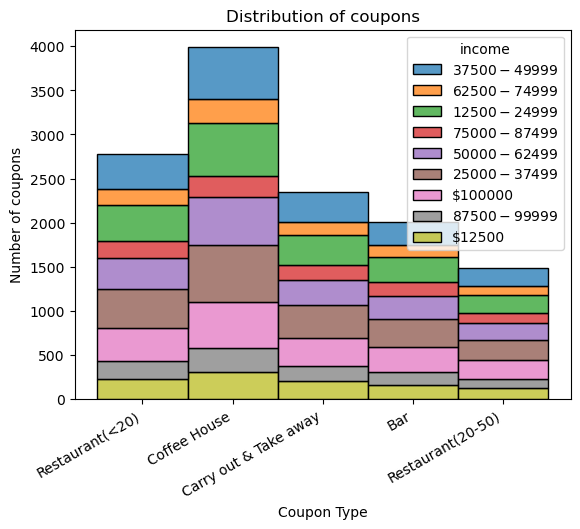

In [1009]:
sns.histplot(x='Coupon_Type', data=CleanedData, hue='income', multiple='stack')

# Adding labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Number of coupons')
plt.title('Distribution of coupons')
plt.xticks(rotation=30, ha='right')

From the above we can see that coffee house was the most selected coupon (we cannot see if it was actually used). 
For this hypothesis we can see that more higher income drivers picked the coffee house than the restaurant, but further analysis would be to see the % of each coupon which went to each income level and see if there was a difference there.

6. Use a histogram to visualize the temperature column.

Hypothesis: Does temperature affect the passangers in the car?

C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

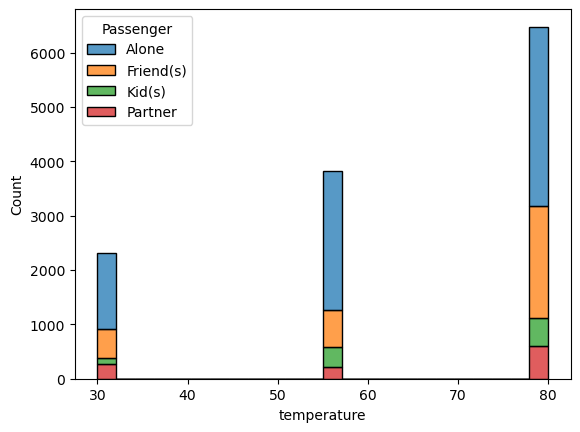

In [1014]:
sns.histplot(x='temperature', data=CleanedData, hue='Passenger', multiple='stack')

From the above we can see a clear pattern between temperature and the passangers, more friends are in the car when the temperature is hotter

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons and the Y column.


In [1018]:
#create a new barcoupon dataframe to hold this summarized data
barCoupon = ''

barCoupon = CleanedData[['Coupon_Type', 'Coupon_Accepted']]
#Remove 'No Value' (my replacement for null values) bar coupons
barCoupon = barCoupon.query('Coupon_Type == "Bar"')
#print(barCoupon)

2. What proportion of bar coupons were accepted?


In [1021]:
#create a dataframe to work with Barcoupons which were accepted
BarCoupon_Acceptance = ''
#get the sizes of each Y/N for the coupon acceptance observation
BarCoupon_Acceptance = barCoupon.groupby('Coupon_Accepted').size().to_frame('size')
#Now use this to determine the % values and add to the dataframe as a new column called Percent
BarCoupon_Acceptance['Percent'] = (BarCoupon_Acceptance['size'] / BarCoupon_Acceptance['size'].sum()) * 100

print(BarCoupon_Acceptance)

                 size    Percent
Coupon_Accepted                 
0                1186  59.004975
1                 824  40.995025


we can now look at the same data in a visualization to get a sense of the size difference, this this I will use a bar chart

<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Yes/No', ylabel='% accepted'>

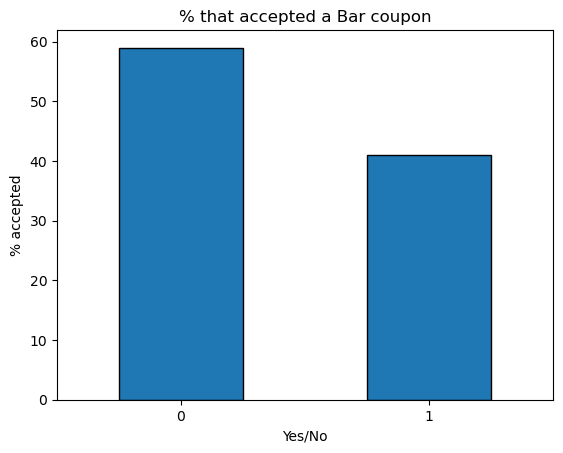

In [775]:
BarCoupon_Acceptance['Percent'].plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Yes/No'
                                     , ylabel='% accepted')

We can see that about 41% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


An assumption here is that we only care about people who picked the 'Bar' coupon, which is the list we have just created

In [1033]:
#create a new barcoupon dataframe to hold this summarized data
CleanedData3 = ''
CleanedData3 = CleanedData
#Create the groupings to fulill the critera who who go to the bar less than 3 time
CleanedData3['Group'] = np.where((CleanedData['Bar'].isin(['1~3', 'less1']))  
                                & (CleanedData['Coupon_Type'] == "Bar")
                               , '< 3 Visits', '> 3 visits')

#Use this to find the number and % for each grouping 
Bar3Coupon_Acceptance = CleanedData3.groupby(['Group','Coupon_Accepted']).size().to_frame('size')
Bar3Coupon_Acceptance['Y_Total'] = Bar3Coupon_Acceptance.groupby('Group')['size'].transform('sum') 
                                                                
Bar3Coupon_Acceptance['Percent'] = (Bar3Coupon_Acceptance['size'] / Bar3Coupon_Acceptance['Y_Total']) * 100
print(Bar3Coupon_Acceptance)

                            size  Y_Total    Percent
Group      Coupon_Accepted                          
< 3 Visits 0                 140      397  35.264484
           1                 257      397  64.735516
> 3 visits 0                5313    12213  43.502825
           1                6900    12213  56.497175


When creating a group which includes the values '1~3', and 'never' are far less likely to use the provided vouchers.

We can display this with a chart in as follows:

<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Yes/No', ylabel='% accepted'>

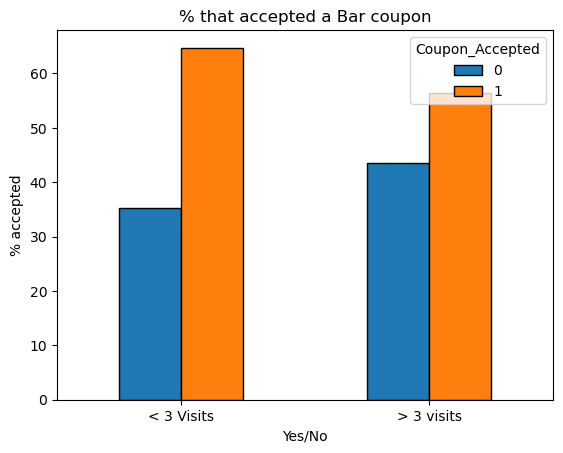

In [1036]:
pivot_Bar3 = Bar3Coupon_Acceptance.pivot_table(index='Group', columns='Coupon_Accepted', values='Percent', fill_value=0)

pivot_Bar3.plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Yes/No'
                                     , ylabel='% accepted')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [1040]:
#Create a new dataframe for this exercise based on the CleanedData Dataframe
CleanedData4 = ''
CleanedData4 = CleanedData

CleanedData4['Group'] = np.where((CleanedData['Bar'].isin(['1~3', '4~8', 'gt8']))  
                                & (CleanedData['Age'] > 25)
                                & (CleanedData['Coupon_Type'] == "Bar")
                               , 1, 0)

#Use this to find the number and % for each grouping 
Q4 = CleanedData4.groupby(['Group','Coupon_Accepted']).size().to_frame('size')
Q4['Y_Total'] = Q4.groupby('Group')['size'].transform('sum') 
                                                                
Q4['Percent'] = (Q4['size'] / Q4['Y_Total']) * 100
print(Q4)

                       size  Y_Total    Percent
Group Coupon_Accepted                          
0     0                5325    12190  43.683347
      1                6865    12190  56.316653
1     0                 128      420  30.476190
      1                 292      420  69.523810


<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Yes/No', ylabel='% accepted'>

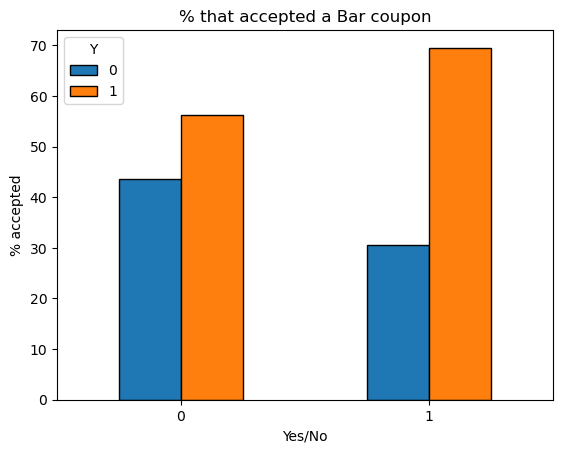

In [689]:
pivot_Bar4 = Q4.pivot_table(index='Group', columns='Y', values='Percent', fill_value=0)

pivot_Bar4.plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Yes/No'
                                     , ylabel='% accepted')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [1062]:
#Create a new dataframe for this exercise based on the CleanedData Dataframe
CleanedData5 = ''
CleanedData5 = CleanedData

CleanedData5['Group'] = np.where((CleanedData['Passenger'].isin(['Alone', 'Friends(s)', 'Partner']))  
                                & (CleanedData['Bar'].isin(['1~3', '4~8', 'gt8']))
                                & (~CleanedData['occupation'].isin(['Farming Fishing & Forestry']))   
                                & (CleanedData['Coupon_Type'] == "Bar")
                               , 1, 0)

#Use this to find the number and % for each grouping 
Q5 = CleanedData5.groupby(['Group','Coupon_Accepted']).size().to_frame('size')
Q5['Y_Total'] = Q5.groupby('Group')['size'].transform('sum') 
                                                                
Q5['Percent'] = (Q5['size'] / Q5['Y_Total']) * 100
print(Q5)

                       size  Y_Total    Percent
Group Coupon_Accepted                          
0     0                5320    12179  43.681747
      1                6859    12179  56.318253
1     0                 133      431  30.858469
      1                 298      431  69.141531


<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Yes/No', ylabel='% accepted'>

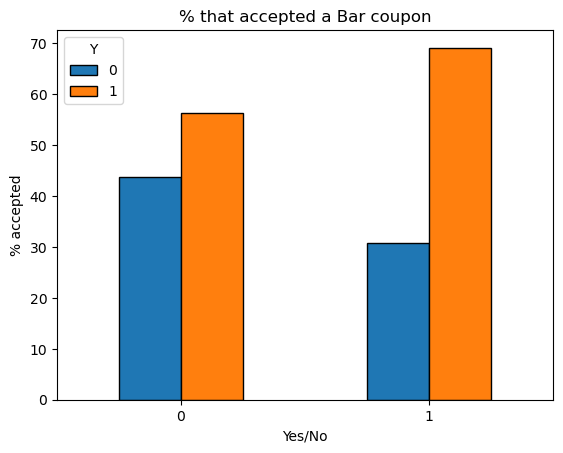

In [685]:
pivot_Bar5 = Q5.pivot_table(index='Group', columns='Y', values='Percent', fill_value=0)

pivot_Bar5.plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Yes/No'
                                     , ylabel='% accepted')

In [1066]:
CleanedData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   Passenger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   Coupon_Type           12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   Age                   12610 non-null  int64 
 9   Marital_Status        12610 non-null  object
 10  Has Children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [1086]:
df1 =''
df2 =''
df3 =''

df1 = CleanedData.query('(Bar in(["1~3", "4~8", "gt8"]) & (Passenger in (["Alone", "Friends(s)", "Partner"])) & ~(Marital_Status in (["Widowed"])))  ')

#go to bars more than once a month and are under the age of 30 *OR*
df2 = CleanedData.query('Bar in(["1~3", "4~8", "gt8"]) & (Age < 30)')

#go to cheap restaurants more than 4 times a month and income is less than 50K. 
df3 = CleanedData.query('RestaurantLessThan20 in(["1~3", "4~8", "gt8"]) & (income in (["$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]) )')

#Merge the 3 datasets using an outer join to get the the rows which are from df1 or df2 or d
CleanedData6_Union = pd.concat([df1, df2, df3])
CleanData6 = CleanedData6_Union.drop_duplicates()

#group by 'Group' and 'Coupon Accepted' and get the count of rows and their relative percentages 
Q6 = CleanData6.groupby(['Group','Coupon_Accepted']).size().to_frame('size')
Q6['Y_Total'] = Q6.groupby('Group')['size'].transform('sum') 
                                                                
Q6['Percent'] = (Q6['size'] / Q6['Y_Total']) * 100
print(Q6)

                       size  Y_Total    Percent
Group Coupon_Accepted                          
0     0                2514     6037  41.643200
      1                3523     6037  58.356800
1     0                 133      431  30.858469
      1                 298      431  69.141531


C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

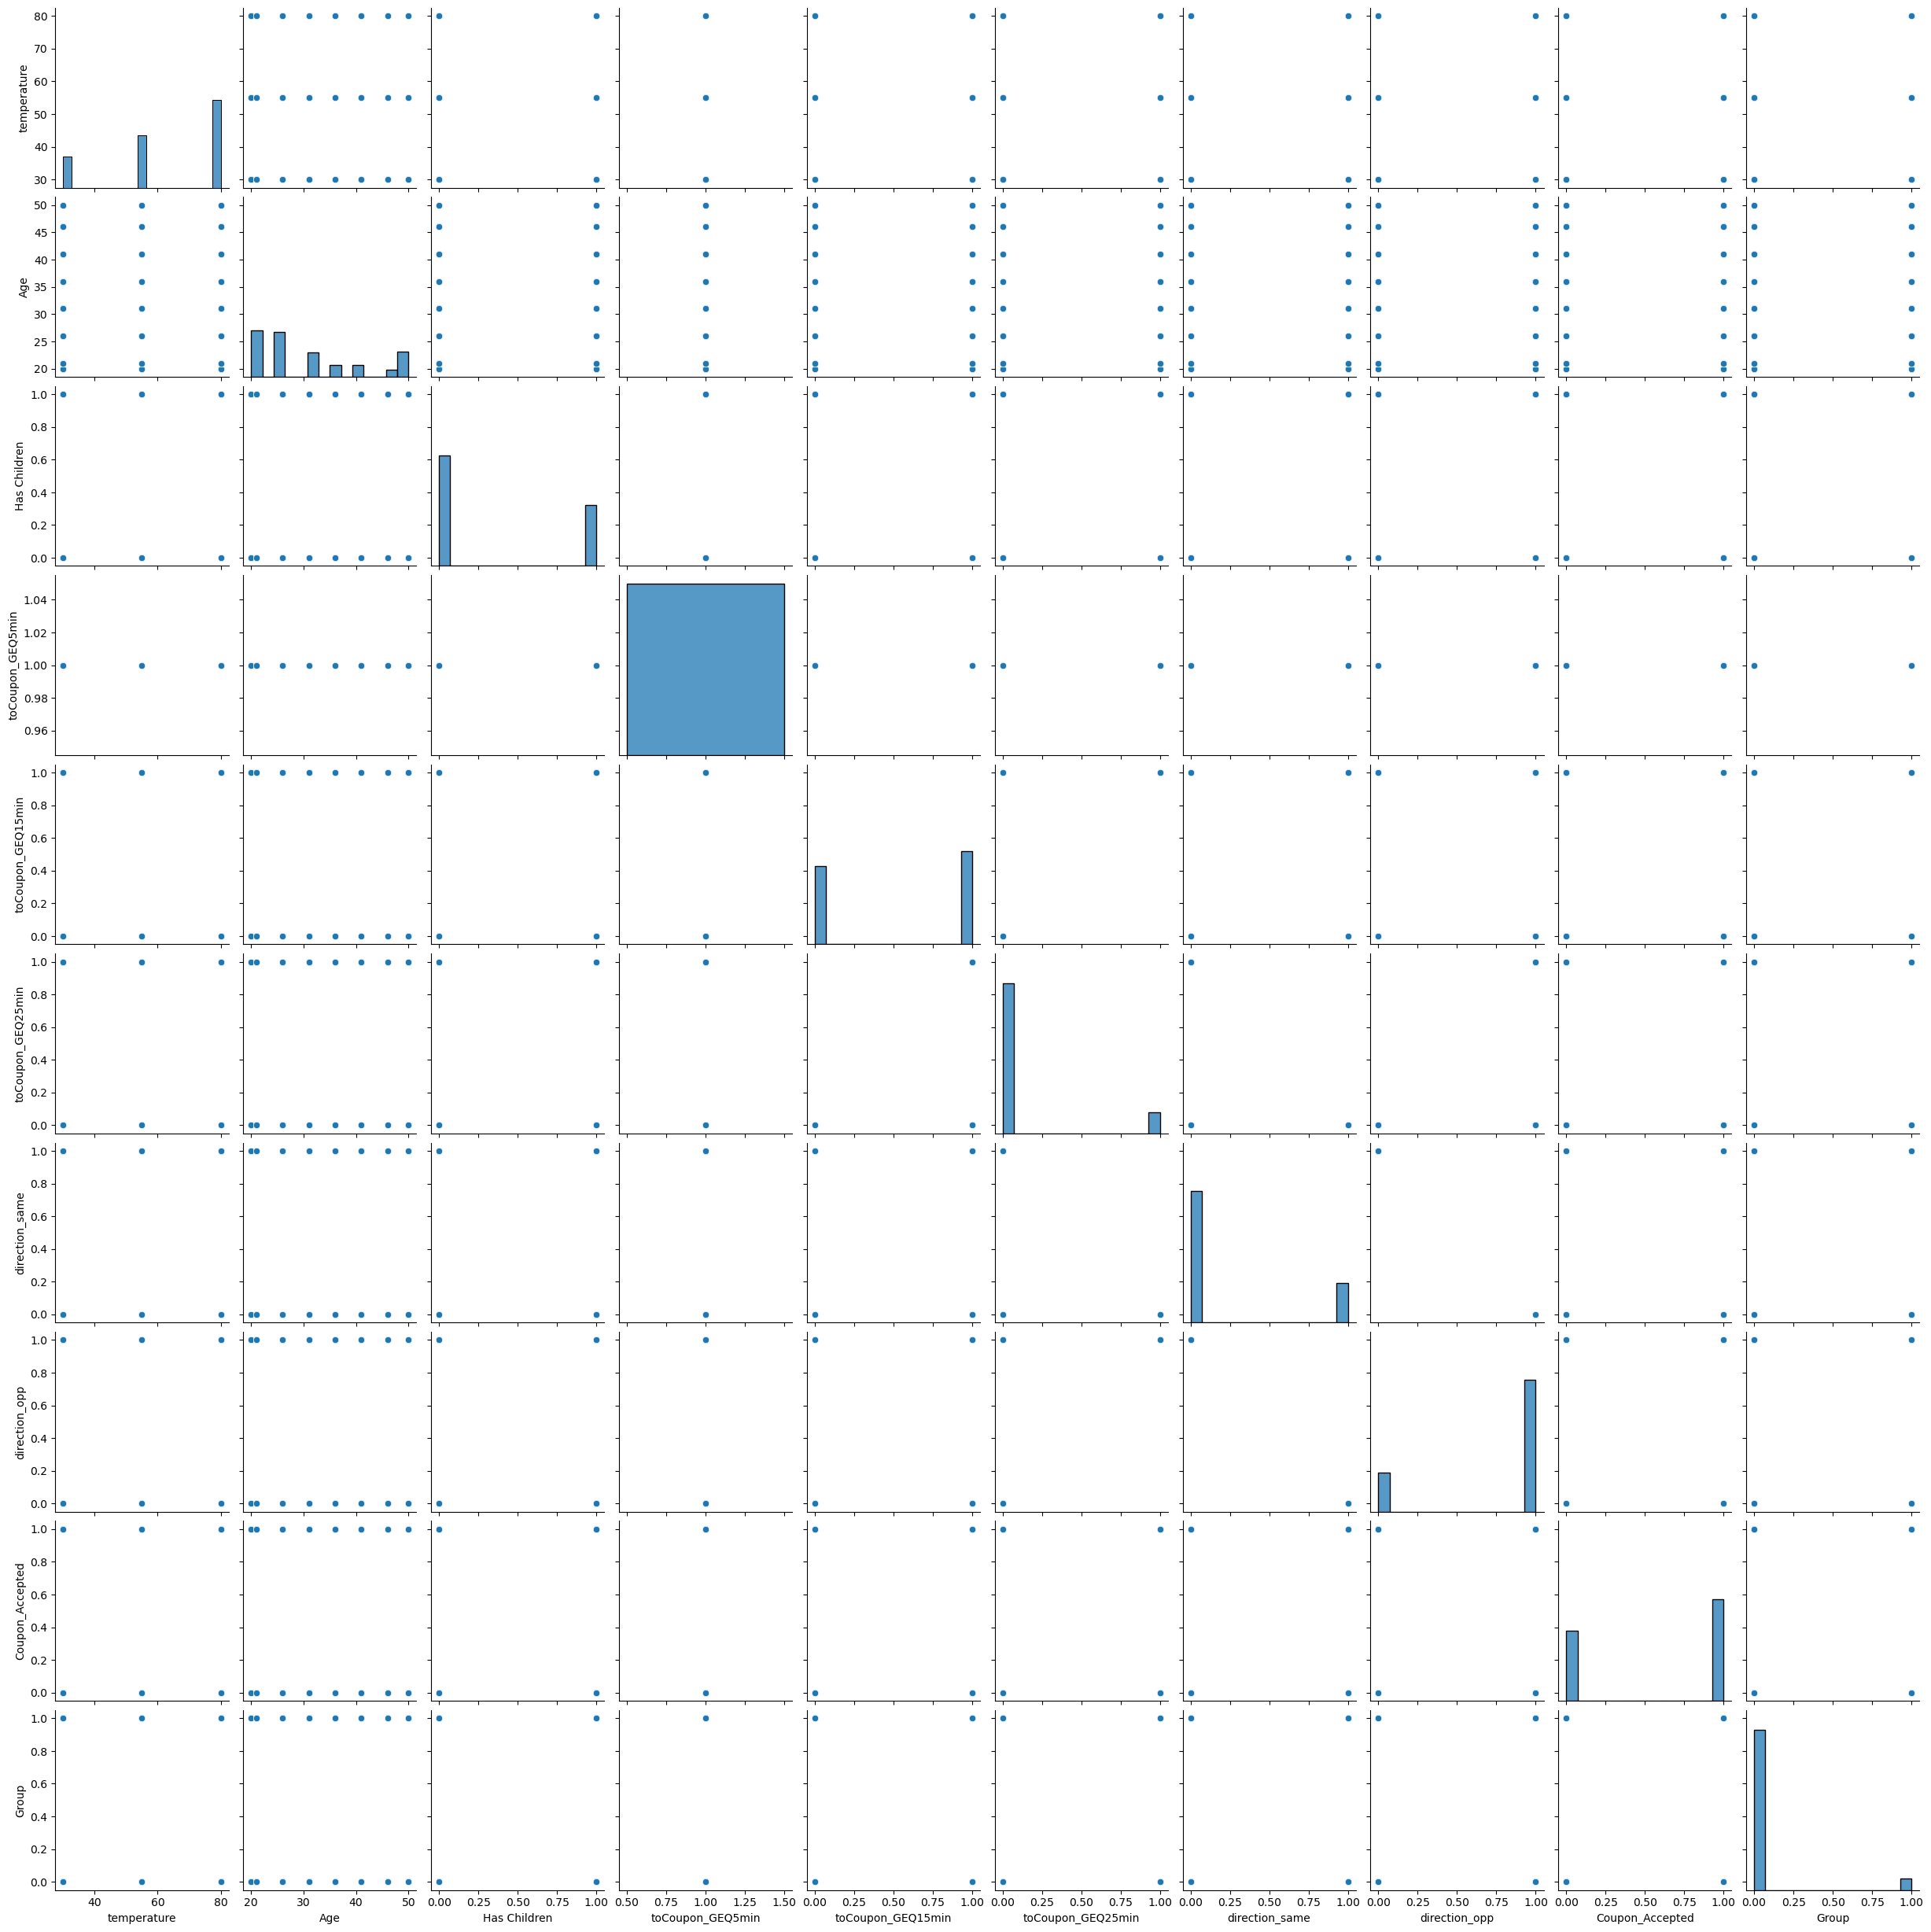

In [1088]:
sns.pairplot(CleanData6)

C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amit2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

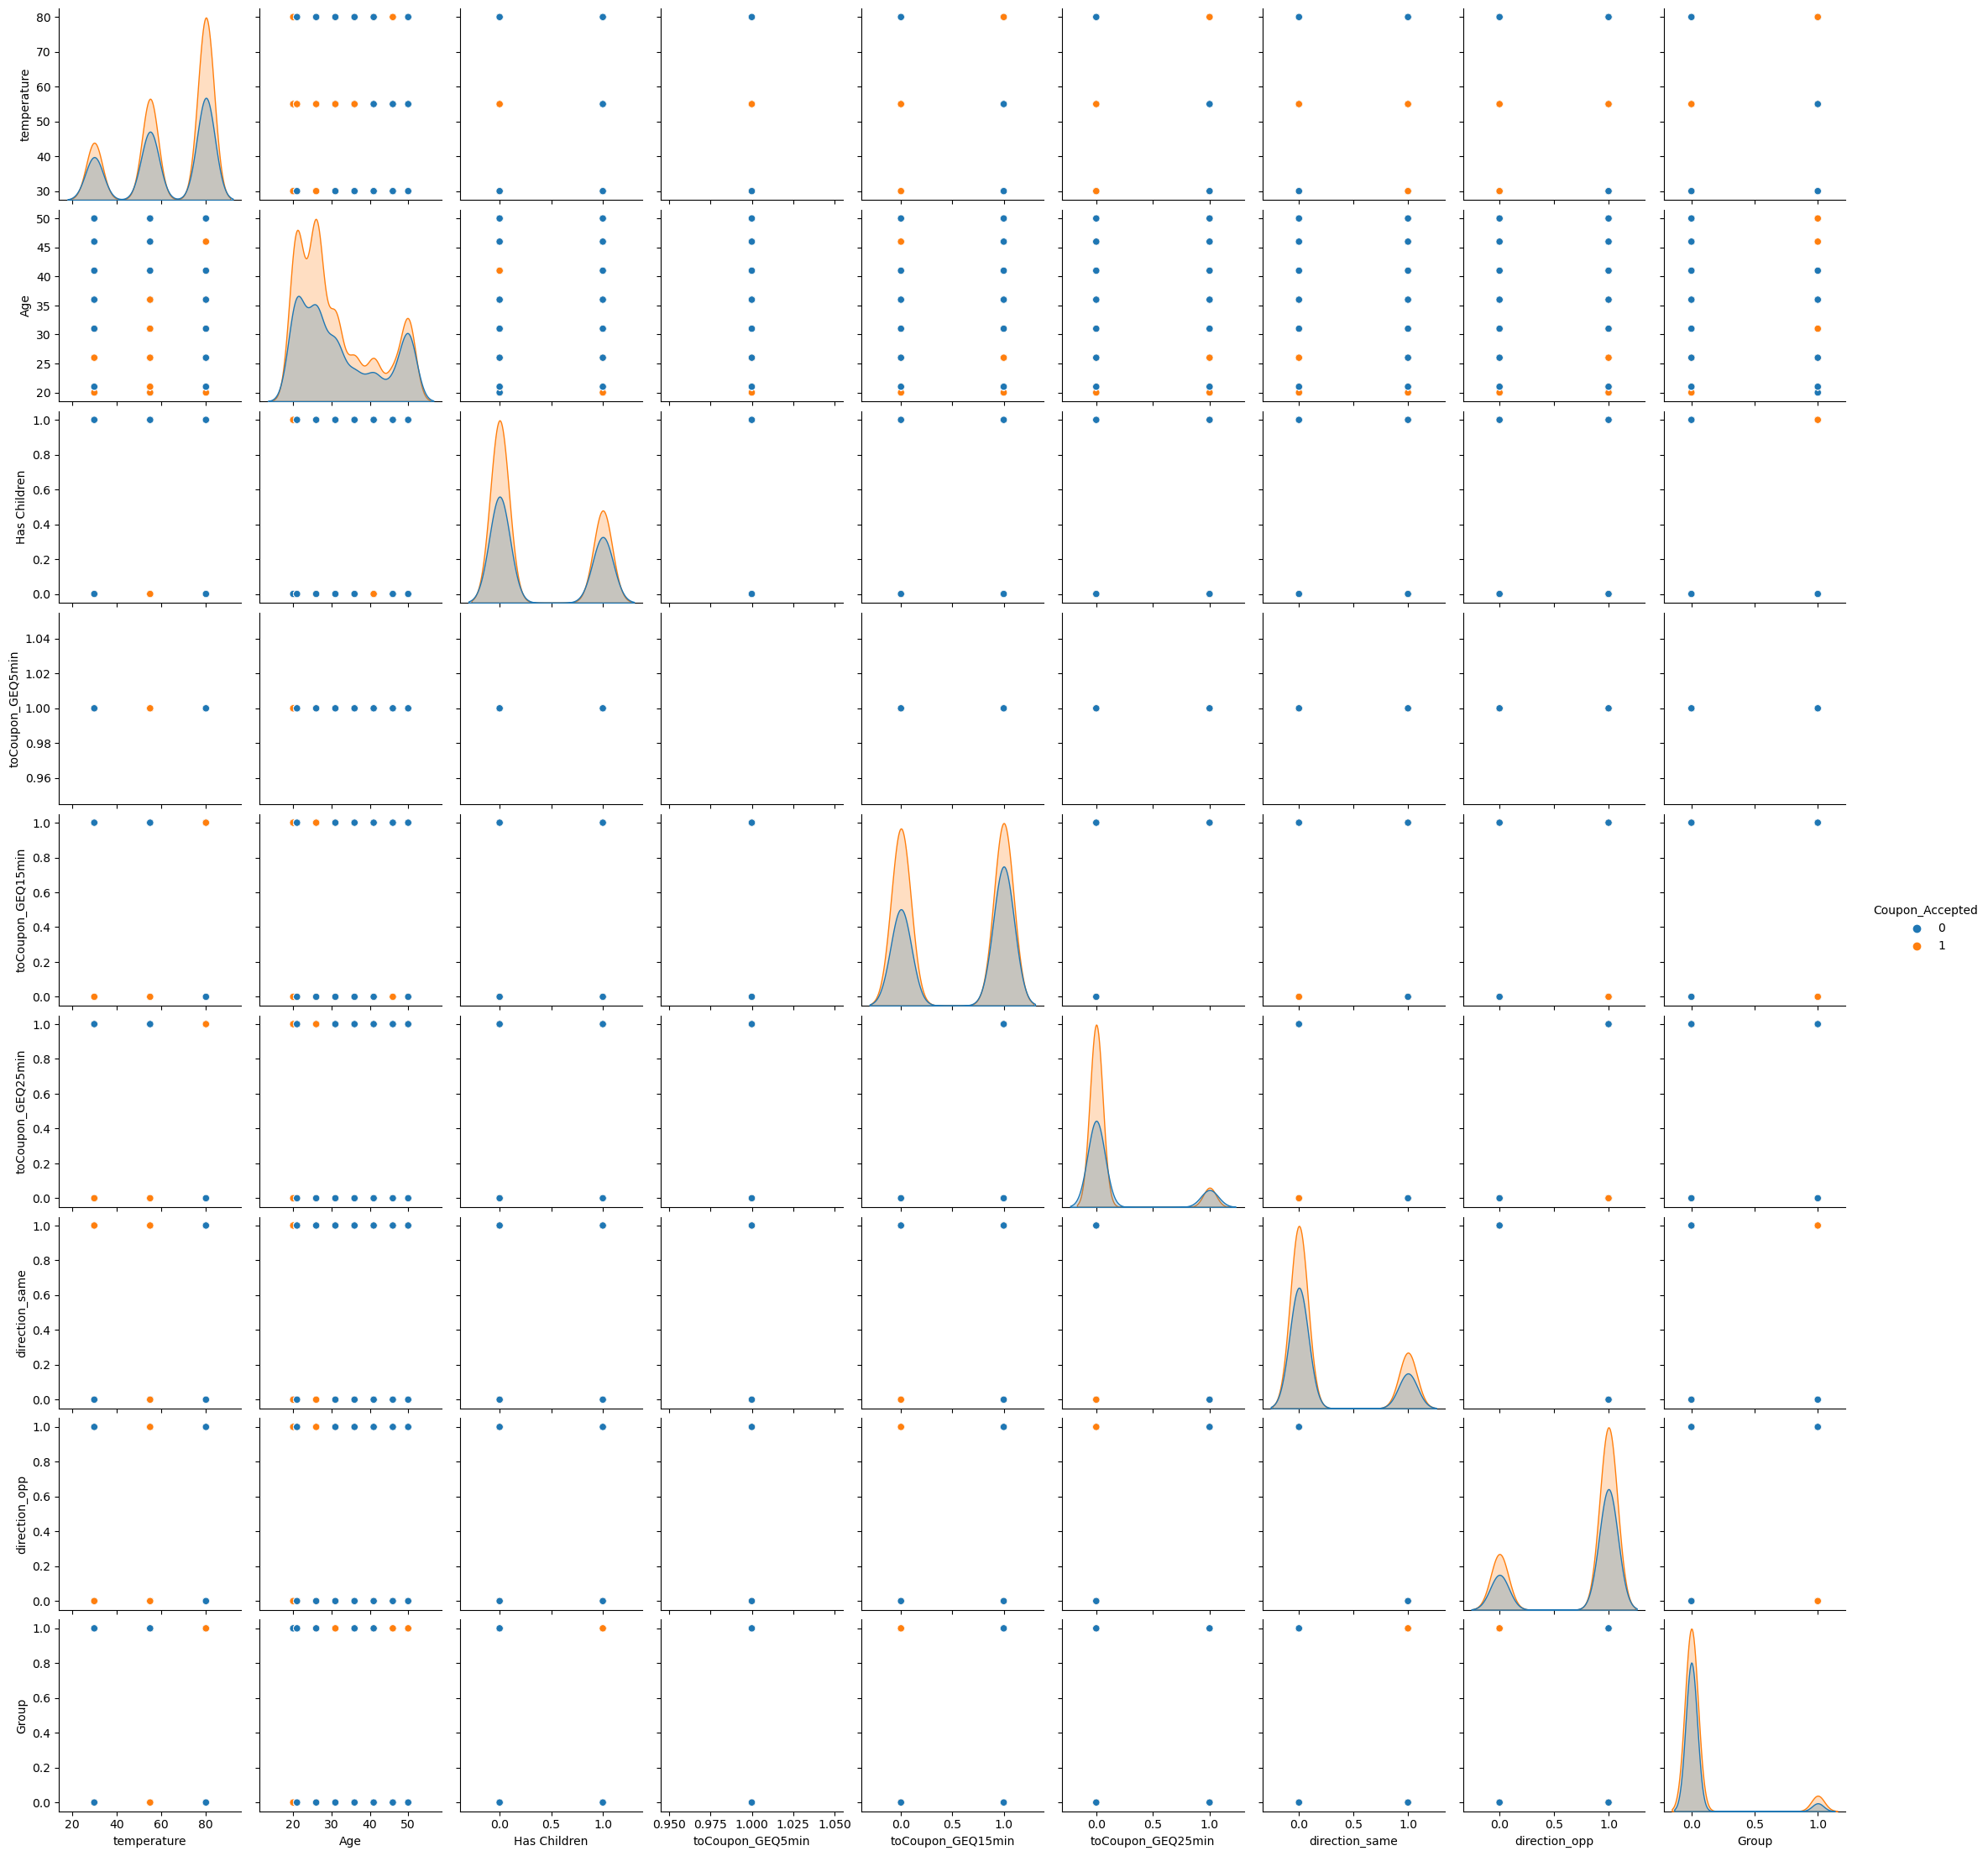

In [1090]:
sns.pairplot(CleanData6, hue='Coupon_Accepted')


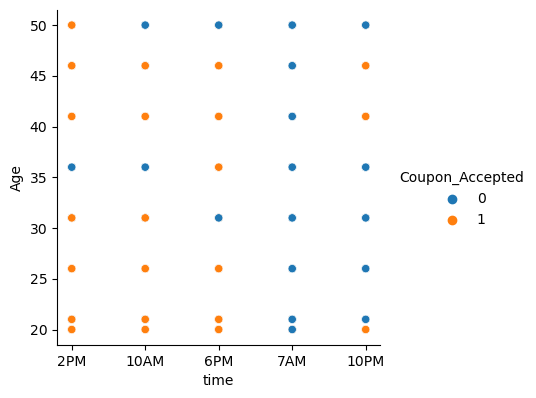

In [1112]:
sns.pairplot(CleanedData, hue='Coupon_Accepted', y_vars=['Age'], x_vars=['time'], height=4 )

In [1126]:
# We will look at the distribution to better understand the sample of age groups
sns.histplot()

<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': False},
              'hovertemplate': 'Coupon_Accepted=1<br>Age=%{x}<br>time=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#636efa'},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'h',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': array([21, 21, 21, ..., 26, 26, 26], dtype=int64),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['2PM', '10AM', '6PM', ..., '6PM', '6PM', '7AM'], dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'box': {'visible': False},
              'hovertemplate': 'Coupon_Accepted=0<br>Age=%{x}<br>time=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Do acceptance of coupons change over time? Draw a line chart which shows how the count moves over time

Do a higher % of drivers who go more often accept coupons? 

In [1130]:
#Create a new dataframe for this exercise based on the CleanedData Dataframe
CleanedData8 = ''
CleanedData8 = CleanedData

#Isolate all the divers who were given a Bar coupon
CleanedData8 = CleanedData.query('Coupon_Type == "Bar"')


<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 9 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2010 non-null   object
 1   Passenger             2010 non-null   object
 2   weather               2010 non-null   object
 3   temperature           2010 non-null   int64 
 4   time                  2010 non-null   object
 5   Coupon_Type           2010 non-null   object
 6   expiration            2010 non-null   object
 7   gender                2010 non-null   object
 8   Age                   2010 non-null   int64 
 9   Marital_Status        2010 non-null   object
 10  Has Children          2010 non-null   int64 
 11  education             2010 non-null   object
 12  occupation            2010 non-null   object
 13  income                2010 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1989 non-null   obje

In [1134]:
#Use this to find the number and % for each grouping 
Q8 = CleanedData8.groupby(['Bar','Coupon_Accepted']).size().to_frame('size')
Q8['Y_Total'] = Q8.groupby('Bar')['size'].transform('sum') 
                                                                
Q8['Percent'] = (Q8['size'] / Q8['Y_Total']) * 100
print(Q8)

                       size  Y_Total    Percent
Bar   Coupon_Accepted                          
1~3   0                 140      397  35.264484
      1                 257      397  64.735516
4~8   0                  33      150  22.000000
      1                 117      150  78.000000
gt8   0                  13       49  26.530612
      1                  36       49  73.469388
never 0                 987     1393  70.854271
      1                 406     1393  29.145729


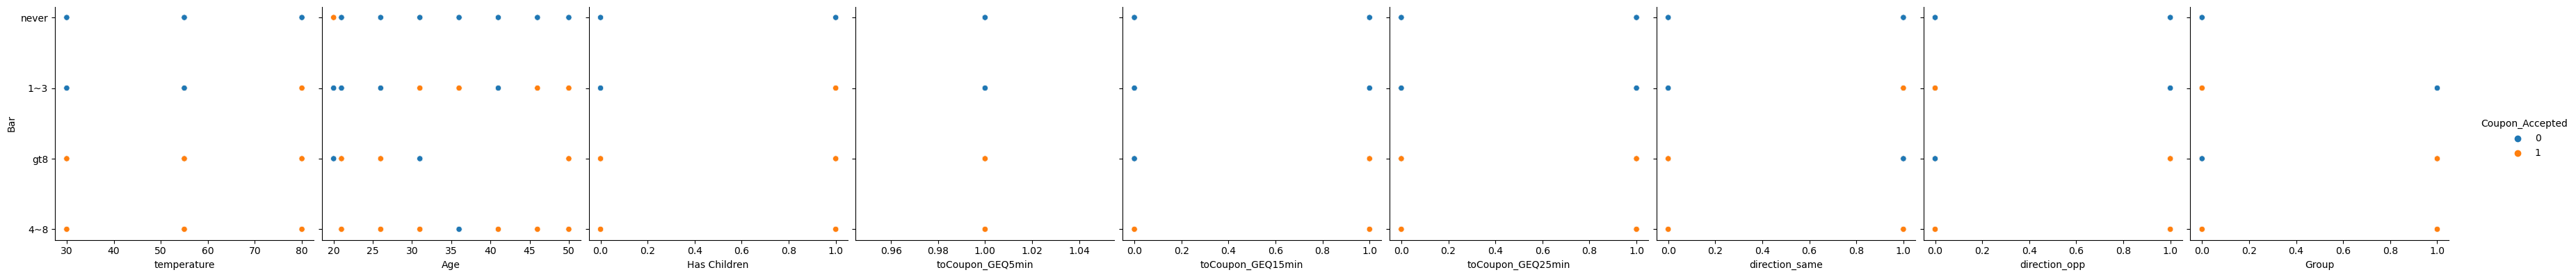

In [1138]:
sns.pairplot(CleanedData8, hue='Coupon_Accepted', y_vars=['Bar'], height=4 )

<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Yes/No', ylabel='% accepted'>

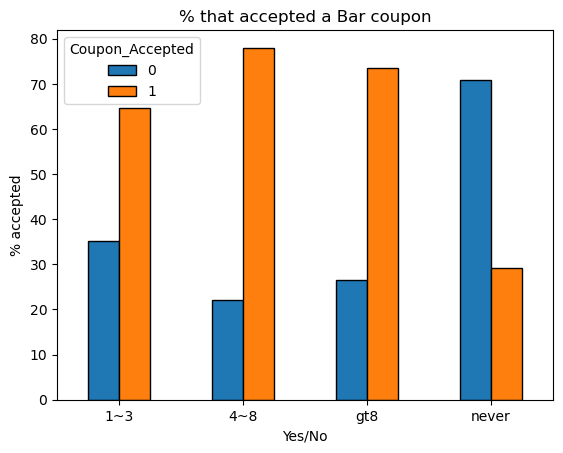

In [1144]:
pivot_Bar8 = Q8.pivot_table(index='Bar', columns='Coupon_Accepted', values='Percent', fill_value=0)

pivot_Bar8.plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Yes/No'
                                     , ylabel='% accepted')

In [1162]:
CleanedData9 = ''
CleanedData9 = CleanedData

#Isolate all the divers who were given a Bar coupon
CleanedData9 = CleanedData.query('Coupon_Type == "Bar"')

#Use this to find the number and % for each grouping 
Coupons9 = CleanedData9.groupby(['Group','Coupon_Accepted', 'Marital_Status']).size().to_frame('size')
Coupons9['Y_Total'] = Coupons9.groupby('Group')['size'].transform('sum') 
                                                                
Coupons9['Percent'] = (Coupons9['size'] / Coupons9['Y_Total']) * 100
print(Coupons9)

                                         size  Y_Total    Percent
Group Coupon_Accepted Marital_Status                             
0     0               Divorced             56     1579   3.546548
                      Married partner     558     1579  35.338822
                      Single              243     1579  15.389487
                      Unmarried partner   182     1579  11.526282
                      Widowed              14     1579   0.886637
      1               Divorced              9     1579   0.569981
                      Married partner     200     1579  12.666244
                      Single              216     1579  13.679544
                      Unmarried partner    94     1579   5.953135
                      Widowed               7     1579   0.443319
1     0               Divorced              1      431   0.232019
                      Married partner      30      431   6.960557
                      Single               57      431  13.225058
          

<Axes: title={'center': '% that accepted a Bar coupon'}, xlabel='Married and Accepted Coupon', ylabel='% accepted'>

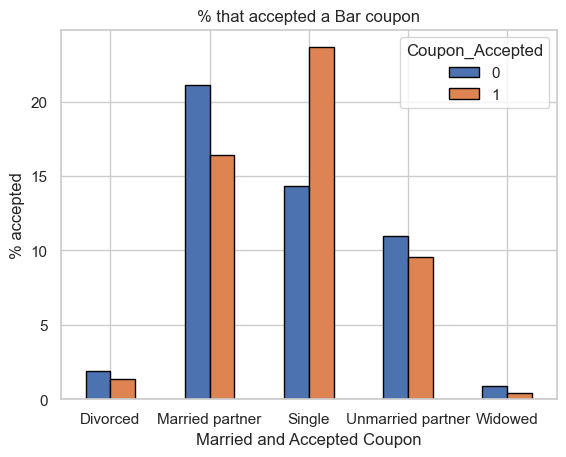

In [1170]:
pivot_Bar9 = Coupons9.pivot_table(index='Marital_Status', columns='Coupon_Accepted', values='Percent', fill_value=0)

pivot_Bar9.plot(kind = "bar"
                                     , edgecolor= "black"
                                     , rot=0
                                     , title = '% that accepted a Bar coupon'
                                     , xlabel='Married and Accepted Coupon'
                                     , ylabel='% accepted')

The data was not a linear set of values, instead each of the columns represented segmented data chosen from a specific set of inputs. This stopped us from doing distribution analysis of this data.

From the investigation above we can see the following:
- The drivers who frequent bars more regularly tended to accept the coupons
- Single people go more often, this is not what I was expecting and may indicate an issue in how we setup this data or are looking at it. We would have expected widowed or divorced people to drink more  tended to accept less often.